<a href="https://www.kaggle.com/code/janadarwish/messed-up-checkerboard-spectral-biclustering?scriptVersionId=262380605" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


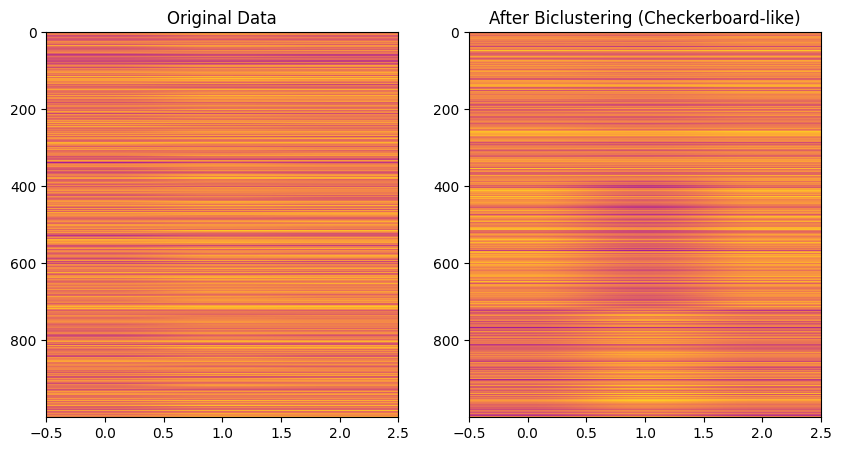

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralBiclustering


df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")


data = df[["math score", "reading score", "writing score"]].values


model = SpectralBiclustering(n_clusters=(3, 3), random_state=42)
model.fit(data)


fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(data, cmap="plasma", aspect="auto")

plt.subplot(1, 2, 2)
plt.title("After Biclustering (Checkerboard-like)")
plt.imshow(fit_data, cmap="plasma", aspect="auto")

plt.show()
